In [82]:
"""
IC272 - DSIII 
lab - 1
Shubham Shukla
B20168
"""

In [1]:
# question 1

# importing important packages
import pandas as pd

# reading data using pandas
database = pd.read_csv("pima-indians-diabetes.csv")

# since we don't need class column hence we will drop it
database = database.drop(['class'], axis = "columns")

# now using describe function we can get a dataframe which gives different columns details viz.
# ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
detail_data = database.describe()

# so we have to drop ['25%','50%','75%','count'] rows
detail_data = detail_data.drop(['25%','50%','75%','count'], axis = "rows")

# since mode and median data is not created by describe function 
# hence we have to make a dataframe for that and then append that data to the detail_data dataframe

# Creating median data dictionary
med_data_lst =dict()
for name in database.columns:
    med_data_lst[name] = database[name].median()

# Creating mode data dictionary
mod_data_lst =dict()
for name in database.columns:
    # mode function gives values in the form of series hence to take only value part, indexing is done
    mod_data_lst[name] = database[name].mode()[0]

# Creating a second dataframe of median and mode to append this dataframe to first one to complete it
detail_data2 = pd.DataFrame([med_data_lst, mod_data_lst], index = ["median", "mode"])
detail_data = detail_data.append(detail_data2)
detail_data

,pregs,plas,pres,skin,test,BMI,pedi,Age
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
median,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
mode,1.000000,99.000000,70.000000,0.000000,0.000000,32.000000,0.254000,22.000000


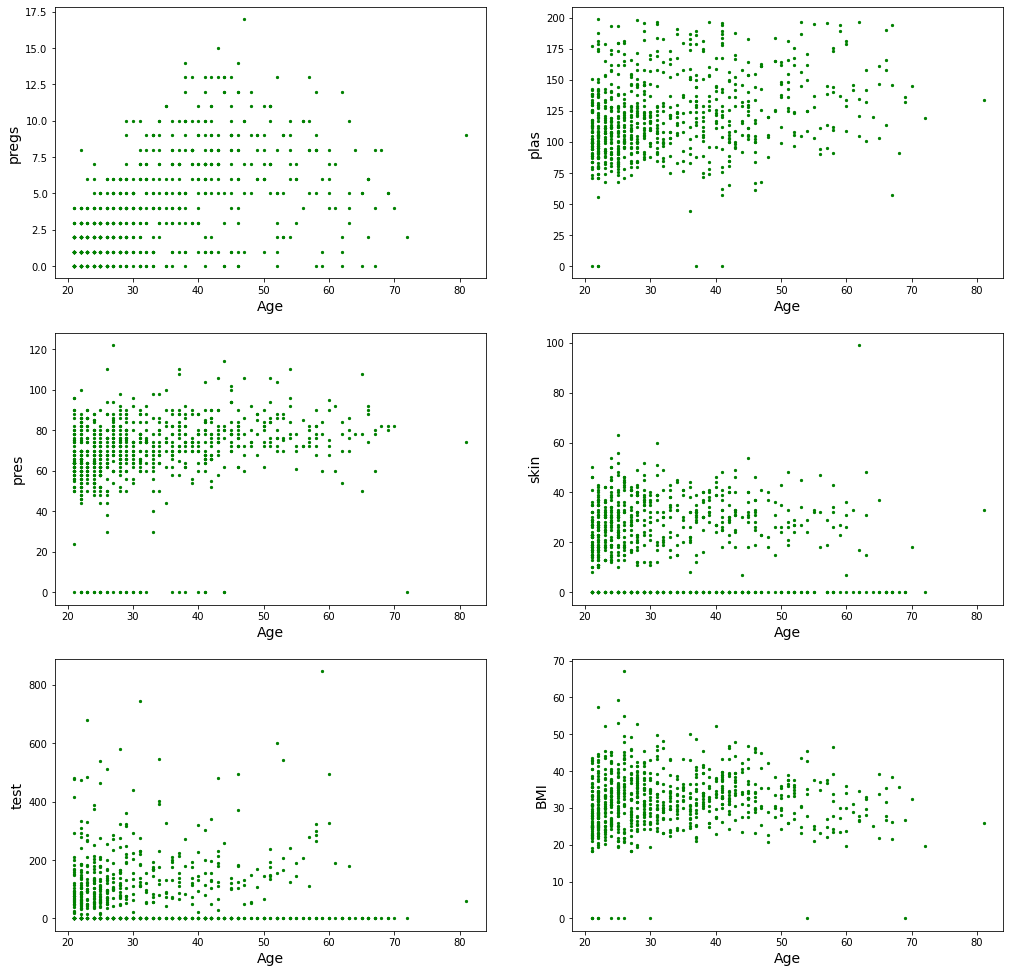

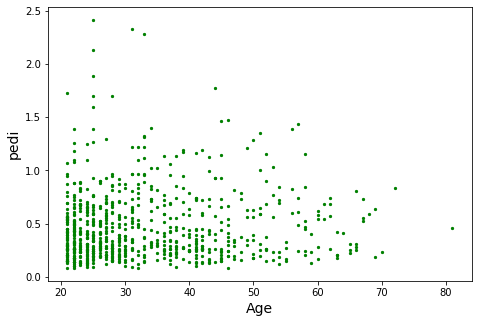

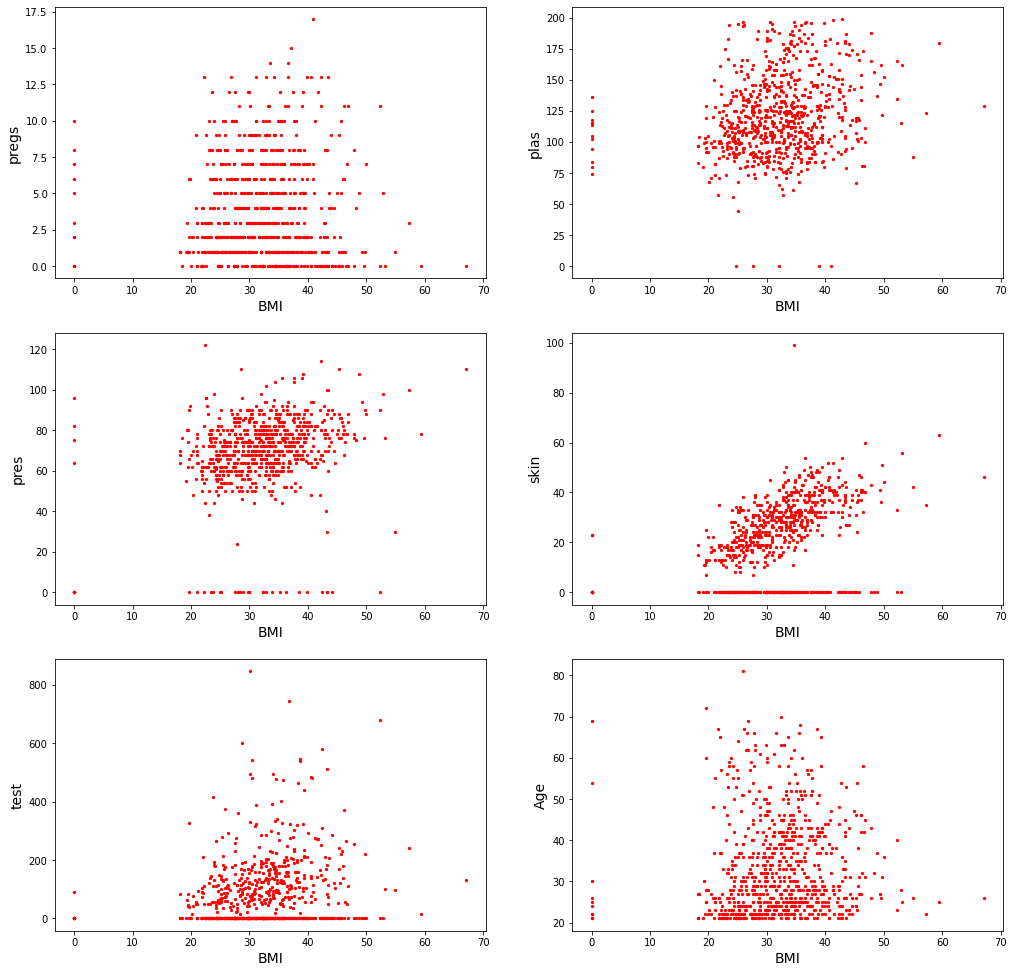

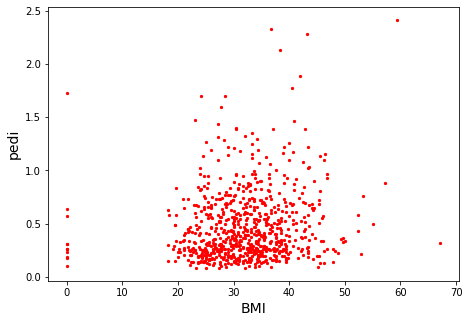

In [2]:
# question 2

# importing important packages
import pandas as pd
import matplotlib.pyplot as plt

# reading data using pandas
database = pd.read_csv("pima-indians-diabetes.csv")

# we will going to use object oriented plot
fig, axes = plt.subplots(3,2, figsize = (17,17))
fig2 = plt.figure()
left_age = fig2.add_axes([0, 0, 0.98, 0.95])
fig, axes2 = plt.subplots(3,2, figsize = (17,17))
fig3 = plt.figure()
left_BMI = fig3.add_axes([0, 0, 0.95, 0.95])

def draw_scatter(row_no = 0, plot_no = 0,):
    name = ['pregs', 'plas', 'pres', 'skin', 'test', 'BMI']
    lst1 = database['Age'];
    x_name = 'Age';
    if plot_no == 1:
        lst1 = database['BMI'];
        x_name = "BMI"
        name = ['pregs', 'plas', 'pres', 'skin', 'test', 'Age']
    lst2 = database[name[row_no*2]]
    
    ax = [axes, axes2]

        
    if(x_name == 'Age'):
        ax[plot_no][(row_no, 0)].scatter(lst1, lst2, color = 'g', s = 5)
    else :
        ax[plot_no][(row_no, 0)].scatter(lst1, lst2, color = 'r', s = 5)
    ax[plot_no][(row_no, 0)].set_xlabel(x_name, fontsize = 14)
    ax[plot_no][(row_no, 0)].set_ylabel(name[row_no*2], fontsize = 14)
    
    lst2 = database[name[row_no*2 + 1]]
    if(x_name == 'Age'):
        ax[plot_no][(row_no, 1)].scatter(lst1, lst2, color = 'g', s = 5)
    else:
        ax[plot_no][(row_no, 1)].scatter(lst1, lst2, color = 'r', s = 5)
    ax[plot_no][(row_no, 1)].set_xlabel(x_name, fontsize = 14)
    ax[plot_no][(row_no, 1)].set_ylabel(name[row_no*2 + 1], fontsize = 14)
for i in range(3):
    draw_scatter(i)
print()
left_age.scatter(database['Age'], database['pedi'], color = 'g', s = 5)
left_age.set_xlabel("Age", fontsize = 14)
left_age.set_ylabel("pedi", fontsize = 14)

for i in range(3):
    draw_scatter(i, 1)

left_BMI.scatter(database['BMI'], database['pedi'], color = 'r', s = 5)
left_BMI.set_xlabel('BMI', fontsize = 14)
left_BMI.set_ylabel('pedi', fontsize = 14)
plt.show()

In [3]:
# question 3
with_corr = ['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi']
age_data = database['Age']
corr_data = dict()
for attribute in with_corr:
    corr_data[attribute] = age_data.corr(database[attribute])

with_corr2 = ['pregs', 'plas', 'pres', 'skin', 'test', 'pedi', 'Age']
age_data2 = database['BMI']
corr_data2 = dict()
for attribute in with_corr2:
    corr_data2[attribute] = age_data2.corr(database[attribute])

print("Correlation of Age with different attributes is : ")
print(pd.Series(corr_data))
print("\n\nCorrelation of BMI with different attributes is : ")
print(pd.Series(corr_data2))

Correlation of Age with different attributes is : 
pregs    0.544341
plas     0.263514
pres     0.239528
skin    -0.113970
test    -0.042163
BMI      0.036242
pedi     0.033561
dtype: float64


Correlation of BMI with different attributes is : 
pregs    0.017683
plas     0.221071
pres     0.281805
skin     0.392573
test     0.197859
pedi     0.140647
Age      0.036242
dtype: float64


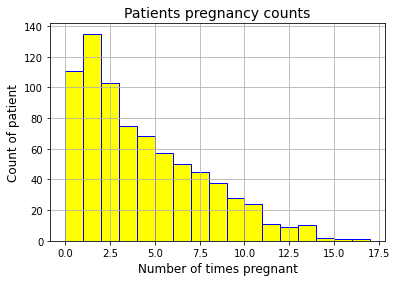

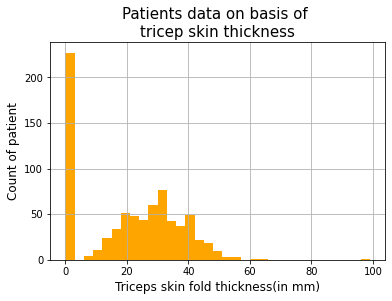

In [13]:
# question 4
# plotting the histogram for attribute preg

preg_data = database['pregs']
bi = range(preg_data.min(), preg_data.max()+1, 1)
plt.hist(preg_data, bins = bi, edgecolor = 'blue', color = 'yellow')
plt.xlabel("Number of times pregnant", fontsize = 12)
plt.ylabel("Count of patient", fontsize = 12)
plt.title("Patients pregnancy counts", fontsize = 14)
plt.grid(True)
plt.show()

print("\n\n")

skin_data = database['skin']
bi2 = range(skin_data.min(), skin_data.max()+1, 3)
plt.hist(skin_data, bins = bi2, color = 'orange')
plt.xlabel('Triceps skin fold thickness(in mm)', fontsize = 12)
plt.ylabel('Count of patient', fontsize = 12)
plt.title("Patients data on basis of \ntricep skin thickness", fontsize = 15)
plt.grid(True)
plt.show()

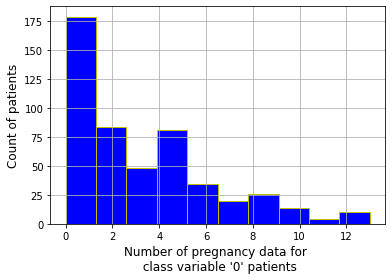

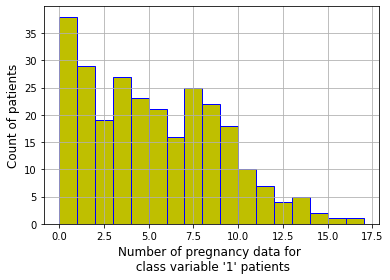

In [51]:
# question 5
data1 = database[database['class'] == 0]
data2 = database[database['class'] == 1]
preg_data1 = data1['pregs']
preg_data2 = data2['pregs']

plt.hist(preg_data1, bins = 10, color = 'blue', edgecolor = 'y')
plt.xlabel("Number of pregnancy data for \n class variable '0' patients", fontsize = 12)
plt.ylabel('Count of patients', fontsize = 12)
plt.grid(True)
plt.show()

bi2 = range(preg_data2.min(), preg_data2.max()+1, 1)
plt.hist(preg_data2, bins = bi2, color = 'y', edgecolor = 'b')
plt.xlabel("Number of pregnancy data for \n class variable '1' patients", fontsize = 12)
plt.ylabel('Count of patients', fontsize = 12)
plt.grid(True)
plt.show()

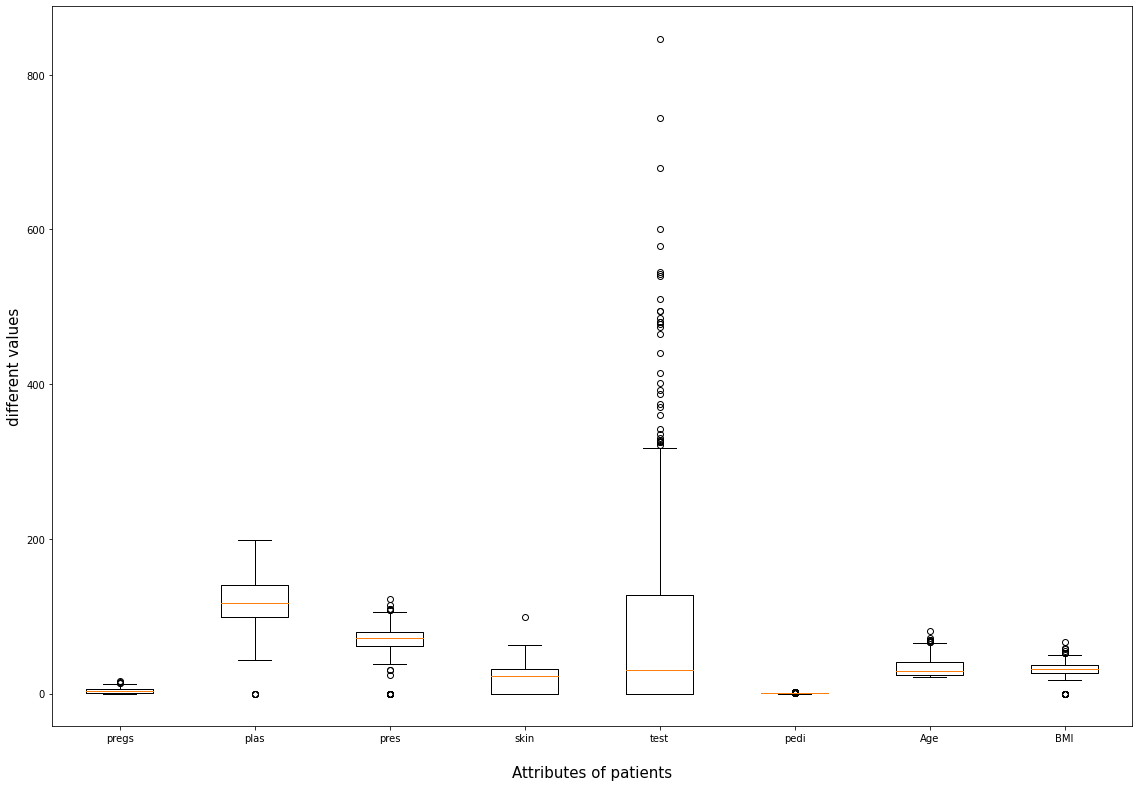

In [66]:
# question 6
import numpy as np
find_plot_lst = ['pregs', 'plas', 'pres', 'skin', 'test', 'pedi', 'Age', 'BMI']
fig = plt.figure(figsize = (15, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(lst_data)
x = np.arange(1, 9)
plt.xticks(x, find_plot_lst)
plt.title("")
plt.xlabel("\nAttributes of patients", fontsize = 15)
plt.ylabel("different values", fontsize = 15)
plt.show()

<ipython-input-20-8d4cd644c967>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


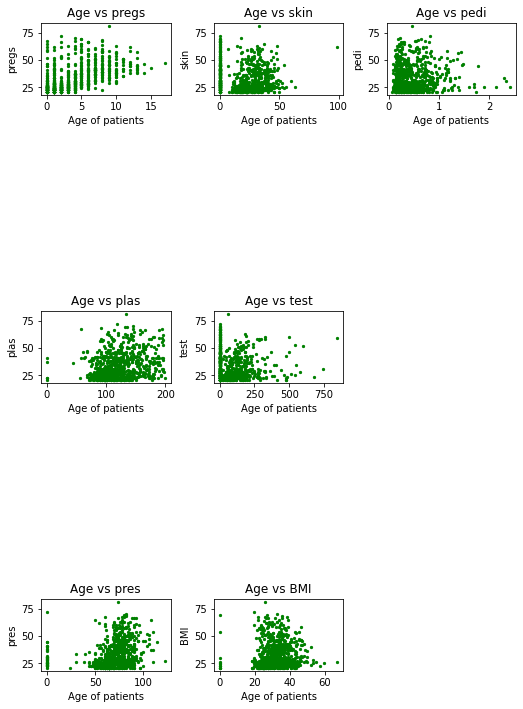

In [20]:
# question 2

# importing important packages
import pandas as pd
import matplotlib.pyplot as plt

# reading data using pandas
database = pd.read_csv("pima-indians-diabetes.csv")

# using object oriented plotting
fig = plt.figure()
def plot_scatter(i, wrt_name):
    name = ['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi']
    x_val = int(i/3)
    ax = fig.add_axes([0 + x_val*0.4, 0.1 + 2 - i%3, 0.3, 0.25])
    plt.title(f'{wrt_name} vs {name[i]}')
    plt.scatter(database[name[i]], database[wrt_name], color = 'g', s = 5)
    plt.xlabel(f'{wrt_name} of patients')
    plt.ylabel(name[i])

for i in range(6, -1, -1):
    plot_scatter(i, 'Age')
plt.tight_layout()
plt.show()

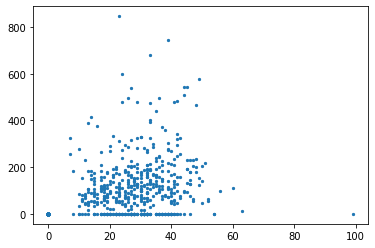

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('pima-indians-diabetes.csv')

plt.scatter(df['skin'], df['test'], s = 5)
plt.show()

In [ ]:
df[df["class"] == 0]['pregs'].plot.hist(bins=20)

In [ ]:
import matplotlib.pyplot as plt
x = [i for i in range(2, 10)]
y = [i for i in range()]
plt.scatter(x, y)
plt.show()